## Importing Libraries 

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

## Loading the Database

In [212]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,6798,109923.66,10851.83,461.78,517.0,949.94,257032.07,-99071.83,-912.950442,0.076052,9.872151
1,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,30.76,1750.0,39.99,3169,97478.44,5622.52,835.78,148.0,271.95,123780.22,-91855.92,-1633.714420,0.046702,5.767963
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,4036,93594.84,9885.59,637.78,341.0,626.58,144929.24,-83709.25,-846.780516,0.084490,10.562110
3,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,3307,86874.89,5948.30,769.78,170.0,312.35,68601.68,-80926.59,-1360.499470,0.051406,6.846973
4,8004,SAZERAC CO INC,5138,Fireball Cinnamon Whisky,11.10,750.0,13.99,5998,66577.80,4812.56,601.57,344.0,270.86,50293.62,-61765.24,-1283.417557,0.057352,7.228476


## Exploratory Data Analysis

- Previously we examined the various tables in the database to identify key variables, to understand their relationships and determine which ones should be included in the final analysis
- In this phase of EDA, we will analyse the resultant table to gain insights into the distribution of each column. This will help us to understand the data patterns, identify anomalies, and ensure data quality before proceeding with further analysis

In [213]:
# summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
VendorNumber,4701.0,9.125857e+03,15643.022701,60.00,3252.00,7153.000000,9552.000000,173357.000000
Brand,4701.0,1.647393e+04,13252.166401,58.00,4414.00,13899.000000,25623.000000,90631.000000
PurchasePrice,4701.0,1.420384e+01,37.707353,0.38,6.53,9.390000,15.190000,2222.210000
Volume,4701.0,8.999668e+02,714.823770,50.00,750.00,750.000000,750.000000,18000.000000
ActualPrice,4701.0,2.071030e+01,48.359478,0.49,9.99,13.990000,21.990000,2799.990000
TotalPurchaseQuantity,4701.0,2.298685e+02,525.552635,1.00,24.00,63.000000,191.000000,12030.000000
TotalPurchaseDollars,4701.0,2.261578e+03,5718.686045,0.72,216.72,690.200000,1984.200000,109923.660000
TotalSalesDollars,4701.0,1.816698e+02,540.608236,0.00,0.00,11.990000,172.780000,10851.830000
TotalSalesPrice,4701.0,7.964973e+01,145.407845,0.00,0.00,10.990000,105.960000,1919.900000
TotalSalesQuantity,4701.0,1.436375e+01,40.937139,0.00,0.00,1.000000,12.000000,837.000000


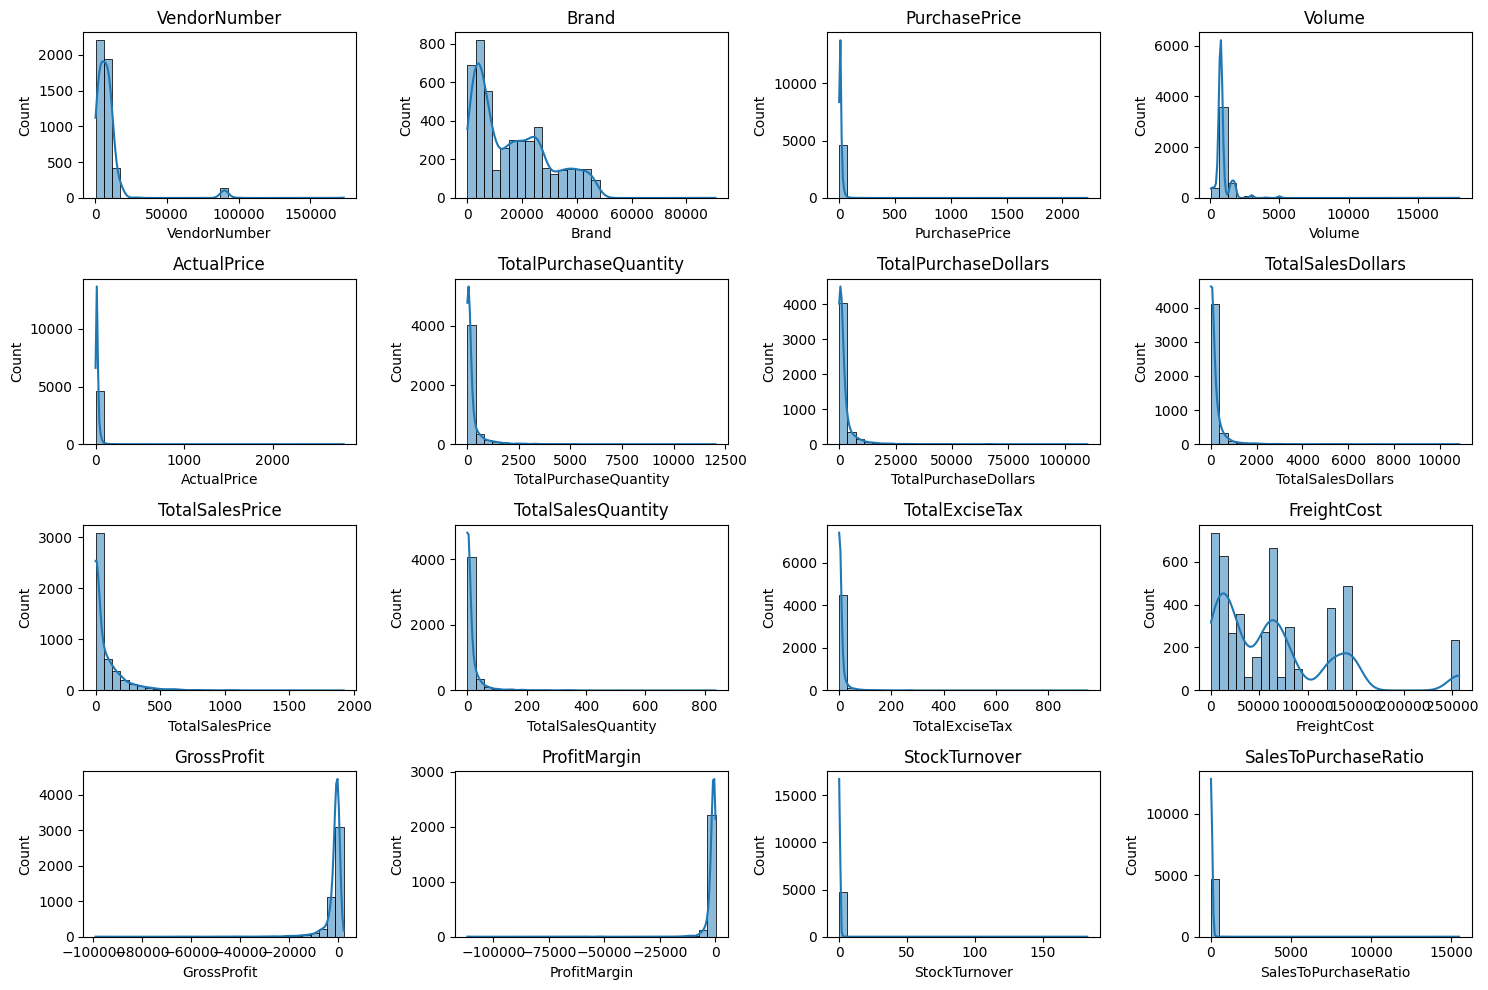

In [214]:
# Distribution Plots for Numerical Columns

numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()  
plt.show()

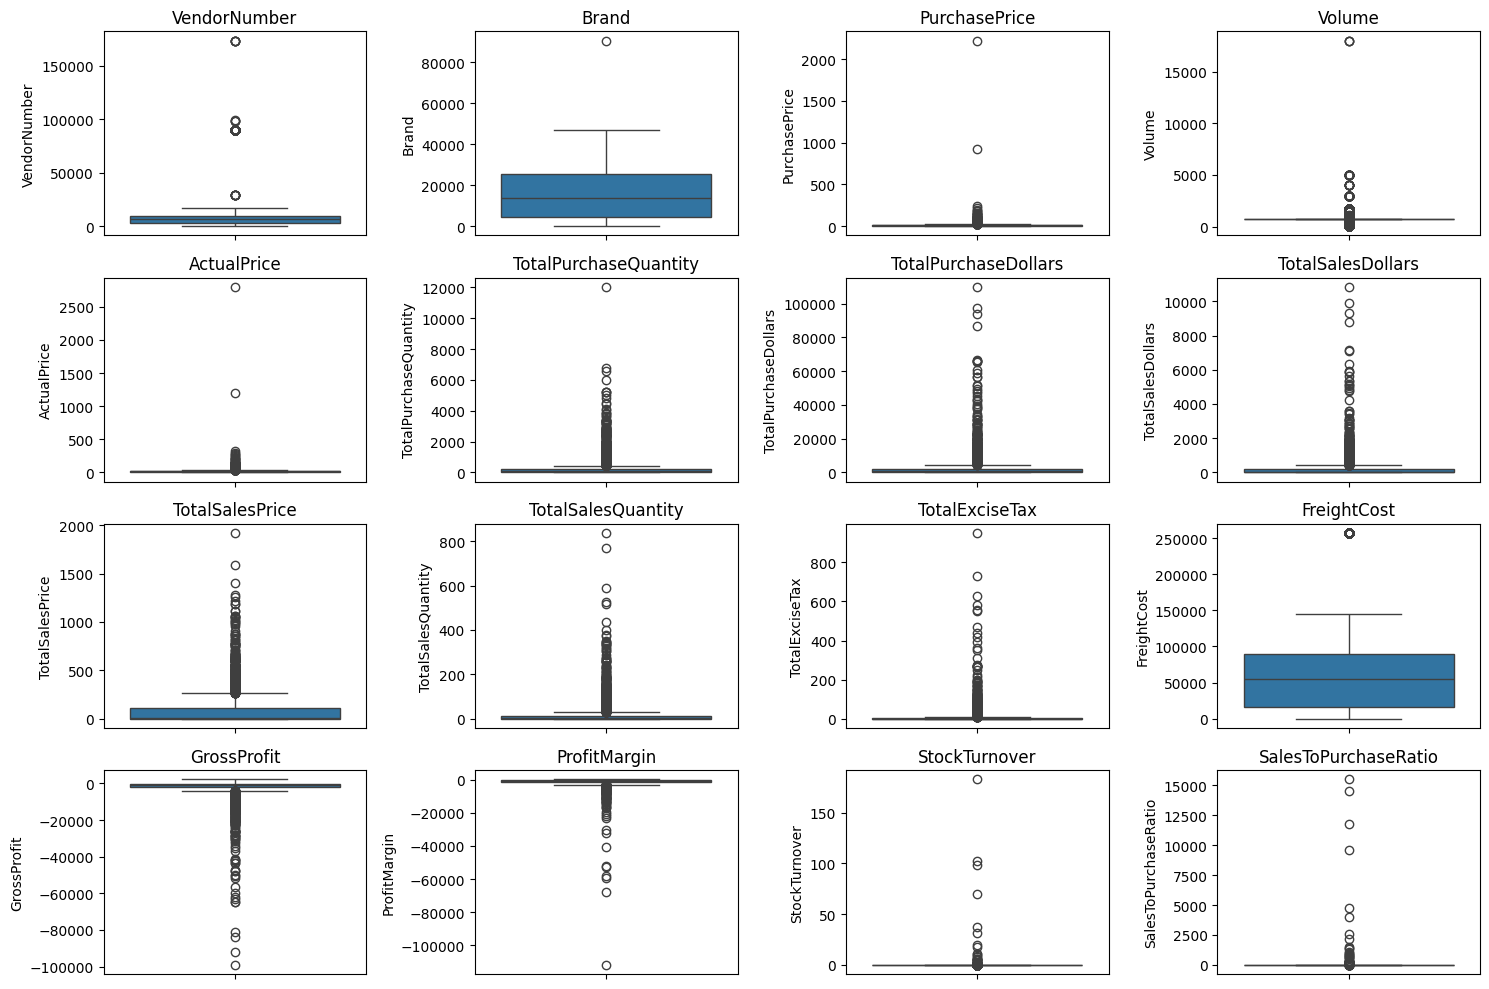

In [215]:
#Outlier Detection using Box Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)  
plt.tight_layout()  
plt.show()

## Summary Statistics Insights

**Negative and Zero Values**

- **Gross Profit**: Minimum Value is -99071.83, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchae price.
- **Profit Margin**: Has a minimum of -infinity, which suggests cases where revenue is zero or even lower than cost (loss)
- **Total Sales Quantity and Sales Dollars**: Minimum values are 0, meaning some products were purchased but were never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviation**

- **Purchase & Actual Prices**: The max values are significantly higher (2222.21, 2799.990000) than the mean (1.420384e+01, 2.071030e+01), indicating potential premium products.
- **Freight Cost**: Huge Variation from 10.53 to 257032.070000, suggests logistics inefficiencies or bulk shipments.
- **Stock Turnover**: Ranges from 0 to 183, implying some products sell extremely fast while others remain in stock indefinitely.Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.

In [216]:
# let's filter data by removing inconsistent values
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0 AND
ProfitMargin > 0 AND 
TotalSalesQuantity > 0""", conn)

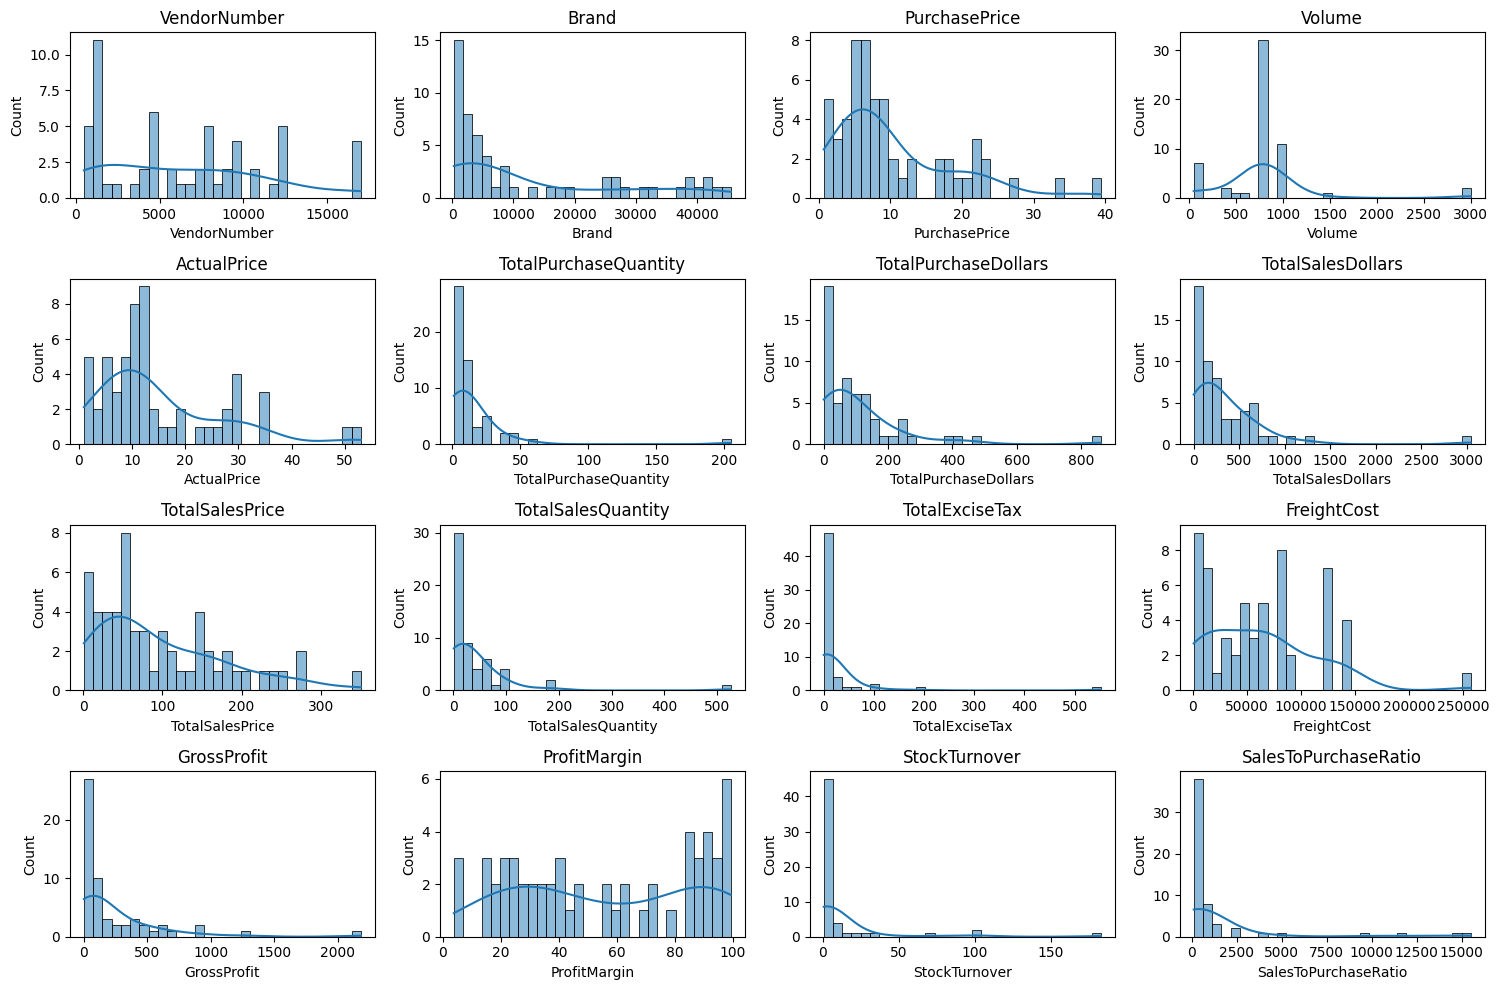

In [217]:
# Distribution Plots for Numerical Columns after removing inconsistent values

numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()  
plt.show()

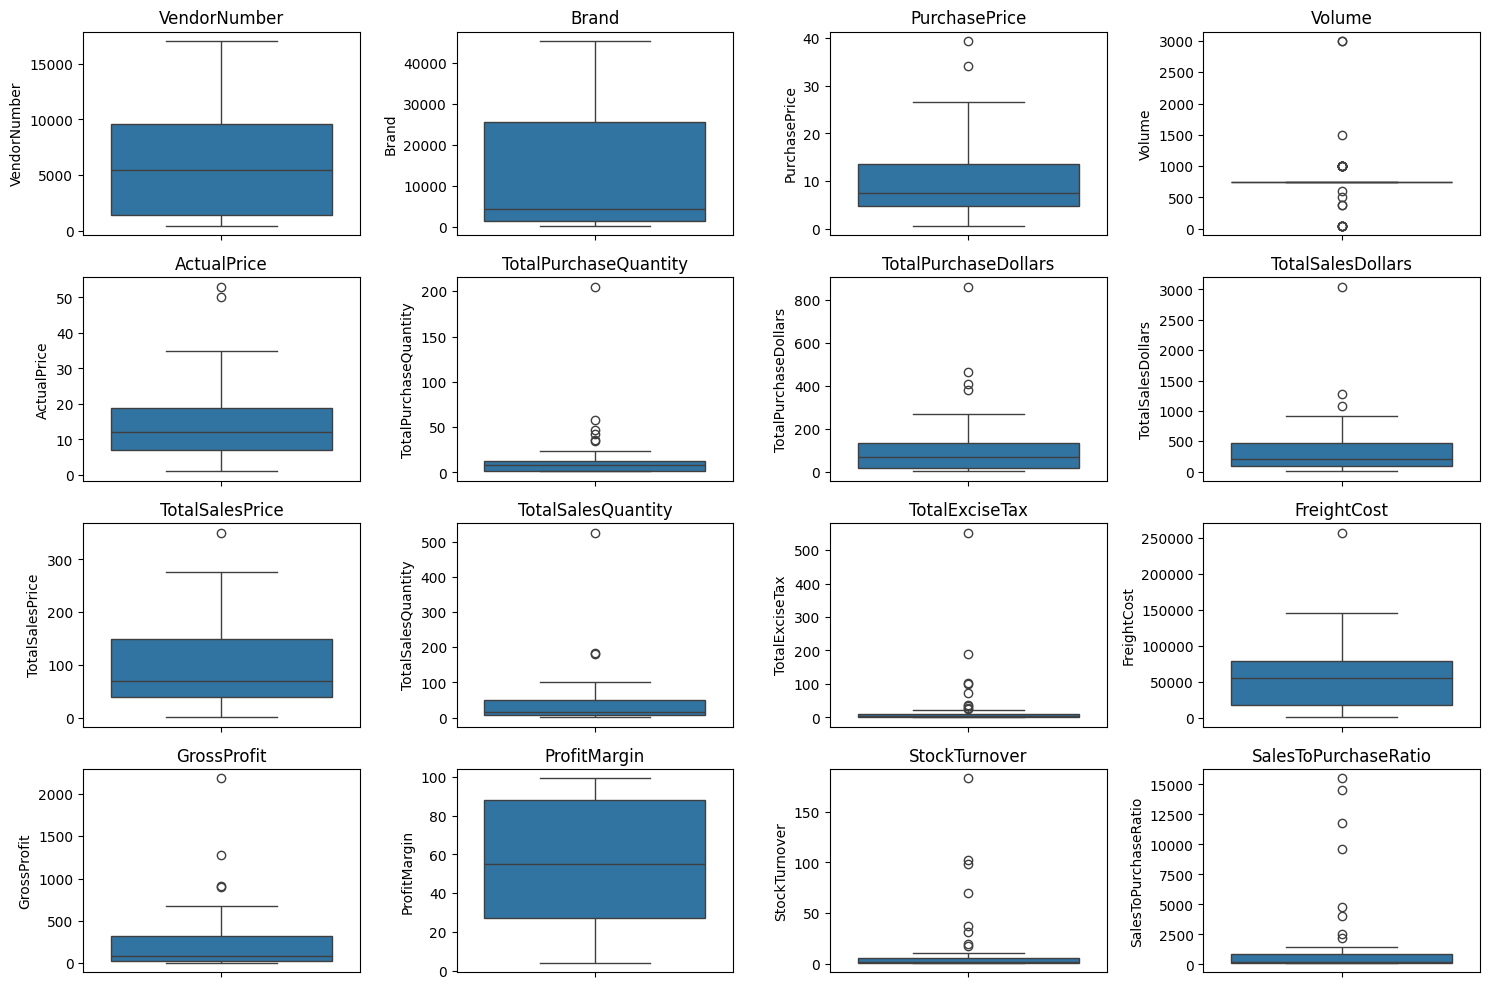

In [218]:
#Outlier Detection using Box Plots after removing inconsistent values
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)  
plt.tight_layout()  
plt.show()

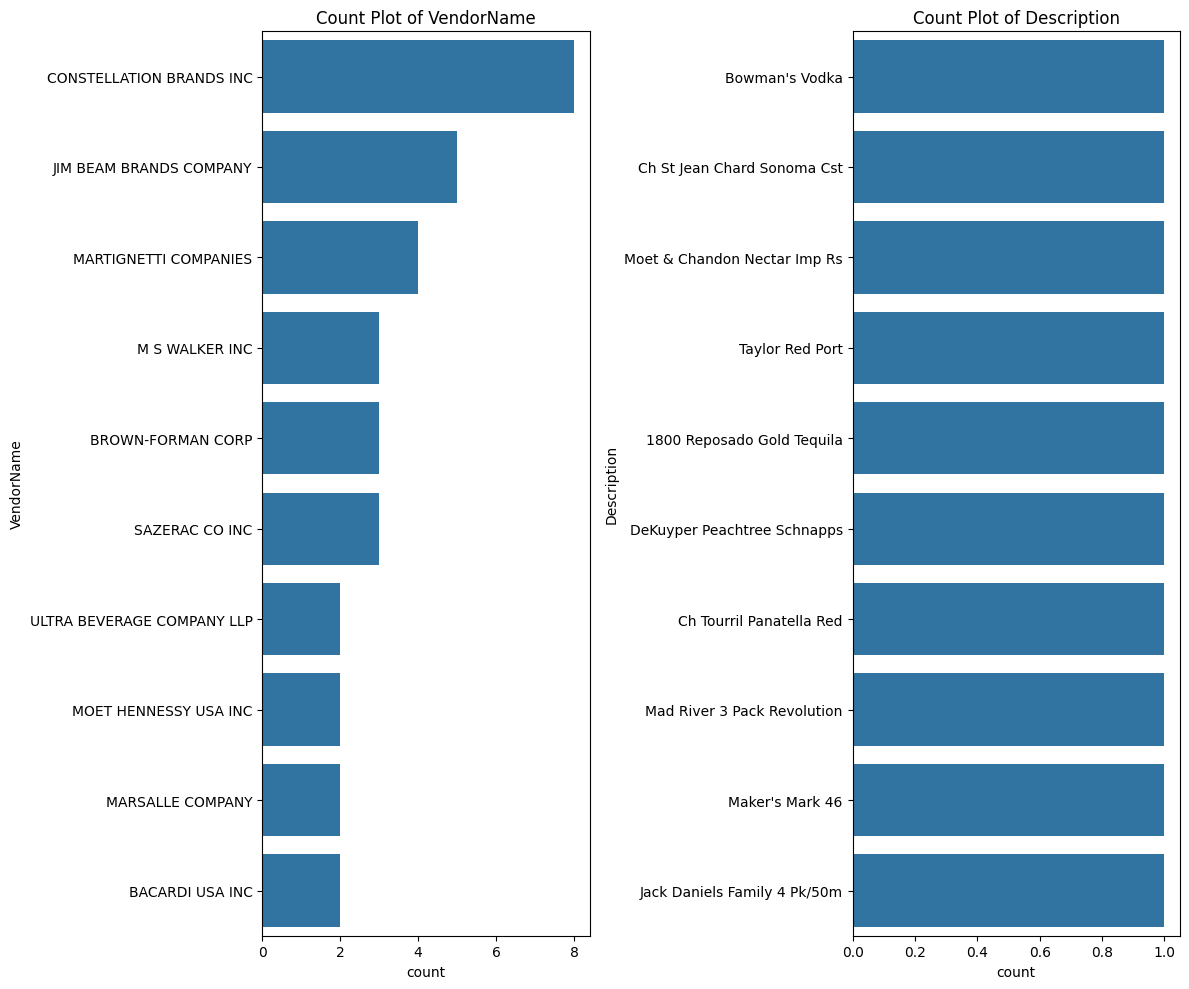

In [219]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,  2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


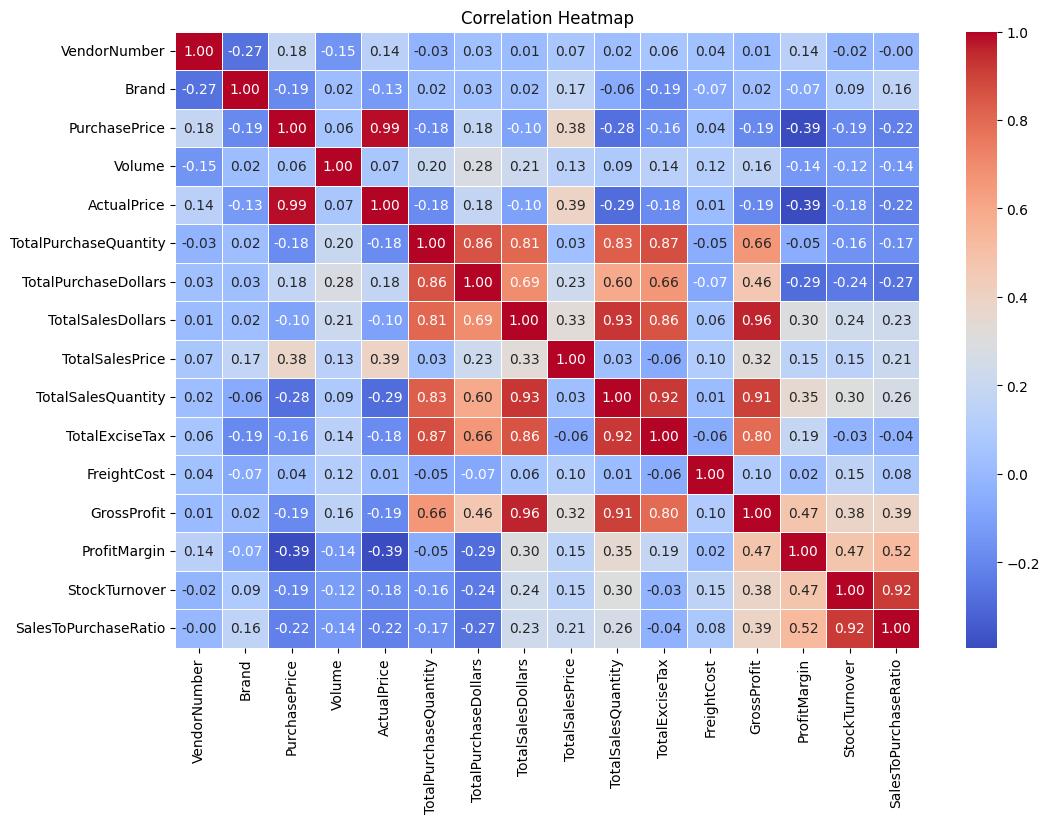

In [220]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")    
plt.show()

## Correlation Insights

- PurchasePrice has weak correlation between Total Sales Dollars(-0.10) and Gross Profit (-0.19), suggesting that price variations do not significantly impact sales or profit.
- Strong correlation between total purchase quantity and sales quantity (0.83), confirming efficient inventory turnover.
- Less correlation between profit margin and total sales price (0.15) 
- StockTurnover has great correlation with Gross Profit (0.38) and Profit Margin (0.47) suggesting efficient inventory management is successfully translating into increased profits

## Data Analysis

Identify Brands that needs **Promotional and pricing adjustments** which exhibit lower sales performance but higher profit margins.

In [221]:
brand_performance = df.groupby('Description').agg(
    {'TotalSalesDollars':'sum',
     'ProfitMargin':'mean'}).reset_index()

In [222]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [223]:
low_sales_threshold

np.float64(52.78)

In [224]:
high_margin_threshold

np.float64(92.97804628874239)

In [225]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margins:")
display (target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
46,Rebel Yell Root Beer Bourbon,36.63,97.897898
51,Skyy Infusions Cranberry,38.61,96.114996


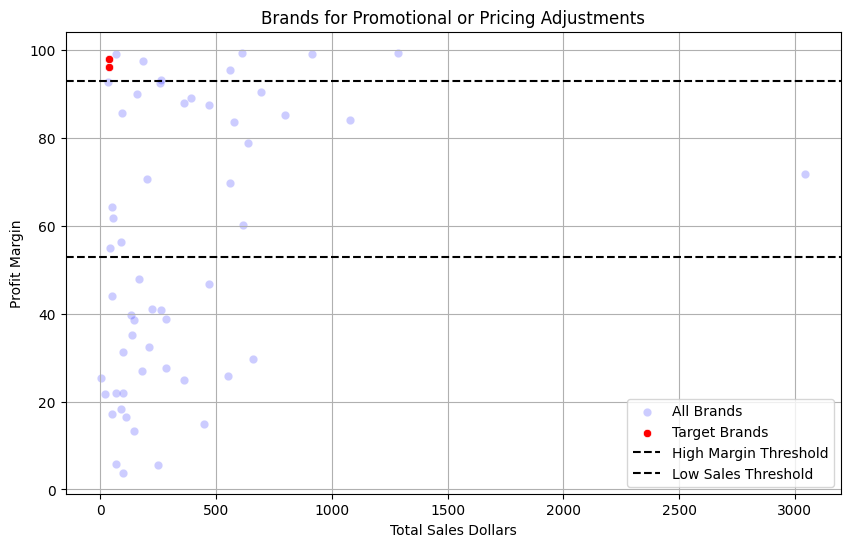

In [226]:
# scatter plot for Total Sales Dollars vs Profit Margin
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color ='blue', label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(y=high_margin_threshold, color='black', linestyle='--', label='High Margin Threshold')
plt.axhline(y=low_sales_threshold, color='black', linestyle='--', label='Low Sales Threshold')

plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(visible=True)
plt.show()


Which brands and vendors demonstrate the highest sales performance?

In [227]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"${value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"${value/1_000:.2f}K"
    else:
        return f"${value:.2f}"

In [228]:
# Top Vendors and Brands by Total Sales Dollars
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
SAZERAC CO INC                3279.34
MARTIGNETTI COMPANIES         3110.60
CONSTELLATION BRANDS INC      2161.78
M S WALKER INC                1903.19
JIM BEAM BRANDS COMPANY       1252.47
ULTRA BEVERAGE COMPANY LLP    1004.93
BROWN-FORMAN CORP              896.44
MOET HENNESSY USA INC          805.80
LAIRD & CO                     692.01
TREASURY WINE ESTATES          659.45
Name: TotalSalesDollars, dtype: float64

In [229]:
top_brands

Description
Bowman's Vodka                  3045.54
DeLoach Ethans Vyd Znfdl        1286.01
Baroca White Rum                1078.20
Clayhouse Adobe Cntrl Cst Wh     913.17
Hallowed Ground Proprtry Red     799.50
Senators Club                    692.01
Ch St Jean Chard Sonoma Cst      659.45
Cribari Chianti                  637.42
Ch Tourril Panatella Red         615.23
Montgras RSV Svgn Bl Casabln     610.98
Name: TotalSalesDollars, dtype: float64

In [230]:
top_brands.apply(format_dollars)

Description
Bowman's Vodka                   $3.05K
DeLoach Ethans Vyd Znfdl         $1.29K
Baroca White Rum                 $1.08K
Clayhouse Adobe Cntrl Cst Wh    $913.17
Hallowed Ground Proprtry Red    $799.50
Senators Club                   $692.01
Ch St Jean Chard Sonoma Cst     $659.45
Cribari Chianti                 $637.42
Ch Tourril Panatella Red        $615.23
Montgras RSV Svgn Bl Casabln    $610.98
Name: TotalSalesDollars, dtype: object

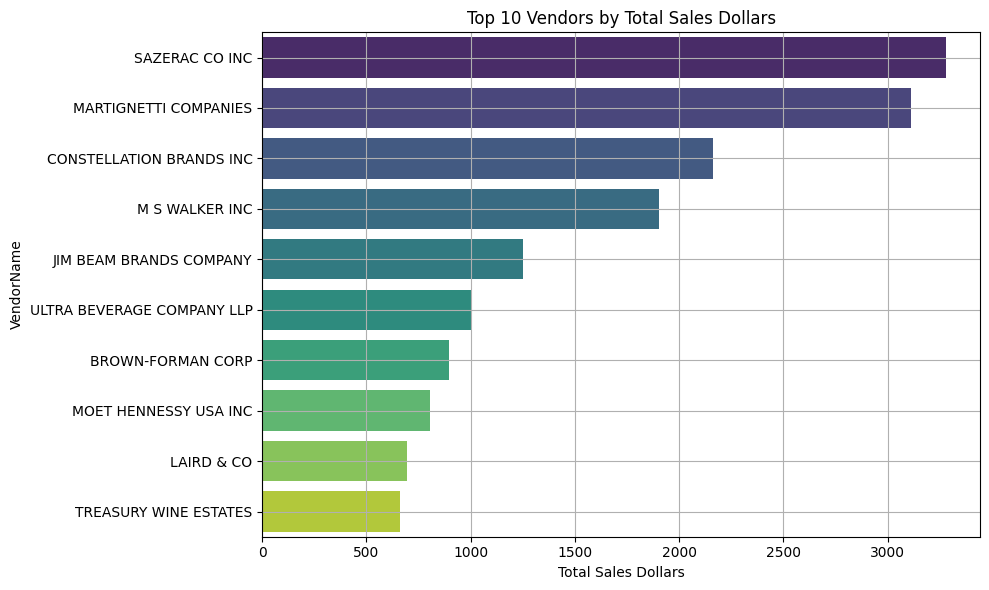

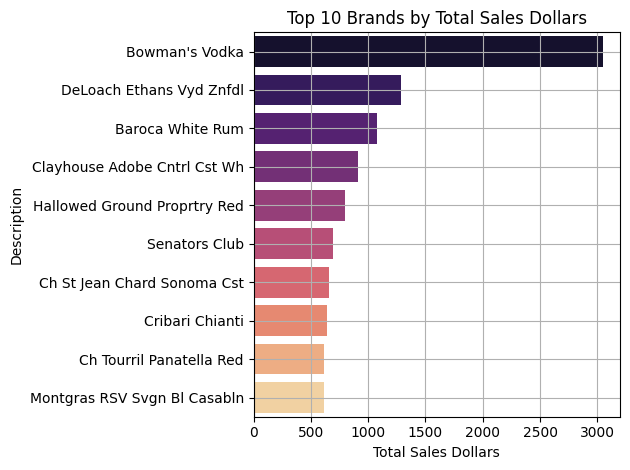

In [231]:
plt.figure(figsize=(10, 6))

# Making a bar plot for top vendors
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='viridis')
plt.xlabel('Total Sales Dollars')
plt.title('Top 10 Vendors by Total Sales Dollars')
plt.grid(visible=True)
plt.tight_layout()
plt.show()

# Making a bar plot for top brands

sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')
plt.xlabel('Total Sales Dollars')
plt.title('Top 10 Brands by Total Sales Dollars')
plt.grid(visible=True)
plt.tight_layout()
plt.show()



### Which vendor contributes the most to the total purchase dollars?


In [232]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(28, 4)

In [233]:
vendor_performance['PurchaseContribution%'] = (vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()) * 100


In [234]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False), 2)

In [235]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
vendor_performance = vendor_performance.sort_values('PurchaseContribution%', ascending=False)
vendor_performance['PurchaseContribution%'] = vendor_performance['PurchaseContribution%'].round(2)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
4,CONSTELLATION BRANDS INC,$1.04K,$1.12K,$2.16K,16.49
23,SAZERAC CO INC,$1.03K,$2.25K,$3.28K,16.25
10,JIM BEAM BRANDS COMPANY,$506.57,$745.90,$1.25K,8.03
14,M S WALKER INC,$501.03,$1.40K,$1.90K,7.94
25,TREASURY WINE ESTATES,$463.42,$196.03,$659.45,7.34
18,MOET HENNESSY USA INC,$427.54,$378.26,$805.80,6.78
26,ULTRA BEVERAGE COMPANY LLP,$288.09,$716.84,$1.00K,4.57
22,PROXIMO SPIRITS INC.,$287.01,$93.86,$380.87,4.55
15,MARSALLE COMPANY,$273.00,$116.87,$389.87,4.33
16,MARTIGNETTI COMPANIES,$228.86,$2.88K,$3.11K,3.63


In [236]:
top_vendors['PurchaseContribution%'].sum()


np.float64(79.90999999999998)

In [237]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
4,CONSTELLATION BRANDS INC,$1.04K,$1.12K,$2.16K,16.49,16.49
23,SAZERAC CO INC,$1.03K,$2.25K,$3.28K,16.25,32.74
10,JIM BEAM BRANDS COMPANY,$506.57,$745.90,$1.25K,8.03,40.77
14,M S WALKER INC,$501.03,$1.40K,$1.90K,7.94,48.71
25,TREASURY WINE ESTATES,$463.42,$196.03,$659.45,7.34,56.05
18,MOET HENNESSY USA INC,$427.54,$378.26,$805.80,6.78,62.83
26,ULTRA BEVERAGE COMPANY LLP,$288.09,$716.84,$1.00K,4.57,67.40
22,PROXIMO SPIRITS INC.,$287.01,$93.86,$380.87,4.55,71.95
15,MARSALLE COMPANY,$273.00,$116.87,$389.87,4.33,76.28
16,MARTIGNETTI COMPANIES,$228.86,$2.88K,$3.11K,3.63,79.91


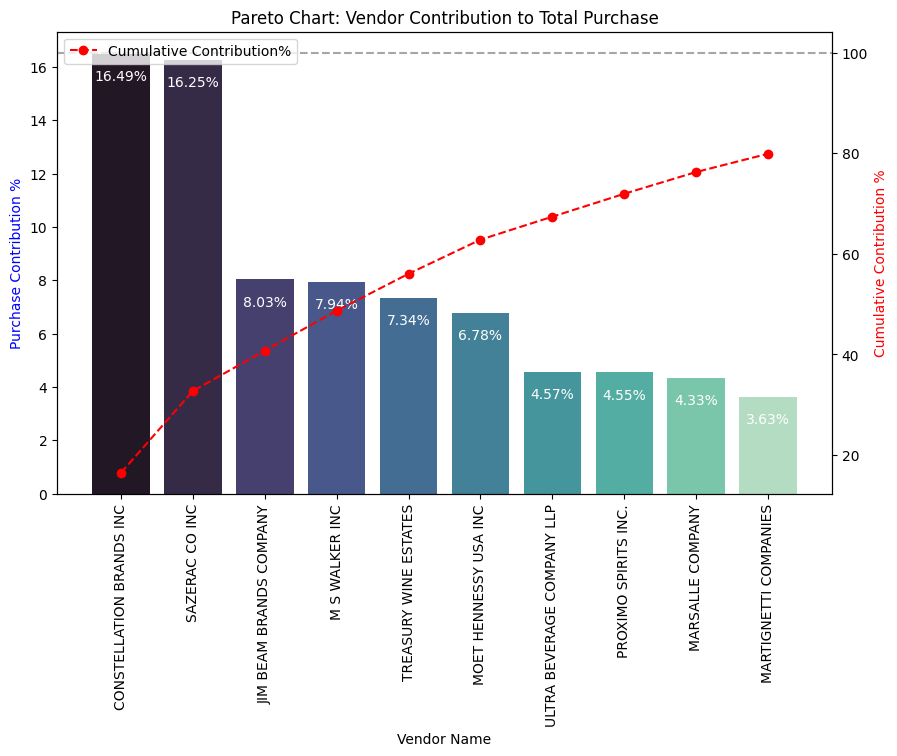

In [238]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', color='white', fontsize=10)

    #Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed' , label='Cumulative Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')    
ax1.set_xlabel('Vendor Name')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase')

ax2.axhline(y=100, color='grey', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper left')

plt.show()

### How much of total procurement is dependent on the top vendors?

In [239]:
print(f"Total Purchase Contribution by Top 10 Vendors: {round(top_vendors['PurchaseContribution%'].sum(), 2)}%")

Total Purchase Contribution by Top 10 Vendors: 79.91%


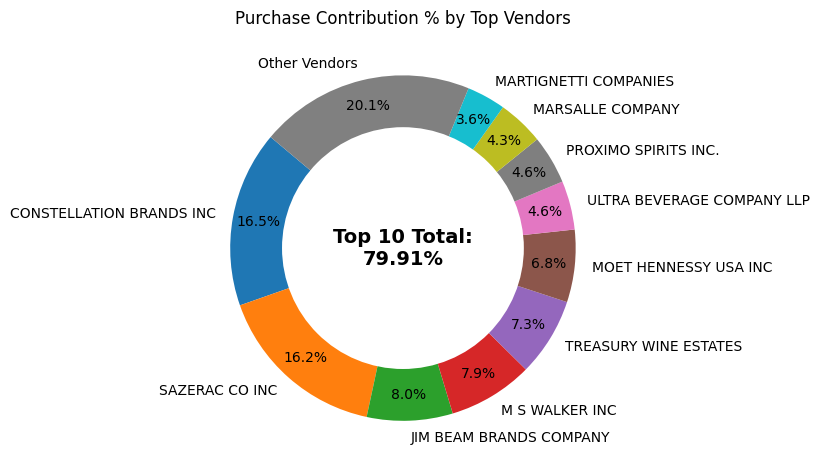

In [240]:
# Generate distinct colors for each section, set last color to gray for 'Other Vendors'
import matplotlib

labels = list(top_vendors['VendorName']) + ['Other Vendors']
sizes = list(top_vendors['PurchaseContribution%']) + [100 - top_vendors['PurchaseContribution%'].sum()]

# Generate colors using a colormap, last color is gray
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(len(top_vendors))]
colors.append('gray')

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85
)

# Draw center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Add total text in the center
ax.text(0, 0, f"Top 10 Total:\n{round(top_vendors['PurchaseContribution%'].sum(), 2)}%", ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Purchase Contribution % by Top Vendors')
plt.tight_layout()
plt.show()


### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings ?

In [241]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']


In [242]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,205
1,Large,58
2,Medium,12
3,Large,42
4,Medium,12
5,Large,24
6,Large,47
7,Medium,6
8,Medium,12
9,Large,18


In [243]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
Small     10.141579
Medium    13.257826
Large      6.090000
Name: UnitPurchasePrice, dtype: float64

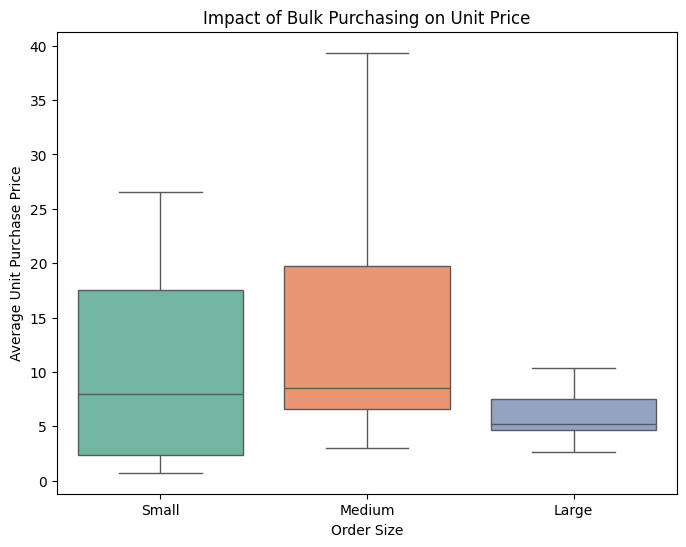

In [244]:
# plotting a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df, palette='Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

Things that we can understand from the above results:

- Vendors buying in bulk (Large Order size) get the lowest unit price ($6.09 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Medium and Large is substantial (~54%) which is quite unique to observe. There is not particular pattern between small, medium and large. 
- It is observed that goods that are purchased in large quantities have unit price the least, then in the small catagory and the highest unit price is when we purchase goods in medium range

### Which vendors have low inventory turnover, indicating excess stock and slow moving products?

In [246]:
df[df['StockTurnover'] < 1].groupby ('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
MARTIGNETTI COMPANIES,0.666667
CONSTELLATION BRANDS INC,0.744048
FLAG HILL WINERY & VINEYARD,0.750000
DELICATO VINEYARDS INC,0.750000
M S WALKER INC,0.833333
MOET HENNESSY USA INC,0.916667
TREASURY WINE ESTATES,0.948276


### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [254]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: $-8321.70


We are observing incconsistency in the TotalSalesQuantity and TotalPurchaseQuantity. The unsold inventory value should either be 0 or in positive, but our results suggests there is a report of selling more than the purchased quantity which is not possible

In [259]:
# Aggregate Capital Locked per vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,TREASURY WINE ESTATES,$23.97
5,DELICATO VINEYARDS INC,$18.36
9,HEAVEN HILL DISTILLERIES,$0.00
7,DIAGEO NORTH AMERICA INC,$0.00
22,PROXIMO SPIRITS INC.,$0.00
1,BANFI PRODUCTS CORP,$-14.18
27,WILLIAM GRANT & SONS INC,$-20.60
11,KOBRAND CORPORATION,$-22.06
15,MARSALLE COMPANY,$-23.61
13,LUXCO INC,$-27.72


### From this, we can see

- HEAVEN HILL DISTILLERIES, DIAGEO NORTH AMERICA INC, PROXIMO SPIRITS INC. have no unsold inventory left
- TREASURY WINE ESTATES	, DELICATO VINEYARDS INC have $23.97 and $18.36 worth of products unsold
- And companies like BANFI PRODUCTS CORP, BANFI PRODUCTS CORP, KOBRAND CORPORATION, MARSALLE COMPANY, LUXCO INC	report negative unsold left. Whoch can imply wrong input in database or inconsistency in their report.

### What is the 95% confidence intervals for profit margins of top-performing vendors? 

In [260]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [261]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [262]:
top_vendors

0     71.729151
1     29.726287
2     25.781520
6     60.122231
10    84.140234
11    69.782282
14    78.820872
18    85.140713
20    83.675918
29    90.475571
31    87.398348
39    95.429286
48    99.312603
49    99.152403
51    99.355134
Name: ProfitMargin, dtype: float64

In [263]:
low_vendors

27    18.318318
30     5.882353
33    21.888791
36    17.253803
37    56.309023
38    43.945044
40    61.837718
42    54.909530
43    64.293959
45    21.819914
52    92.766373
53    96.114996
54    25.252525
55    97.897898
56    98.961039
Name: ProfitMargin, dtype: float64

In [264]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard Error
    t_critical = stats.t.ppf((1 + confidence) / 2., len(data)-1)
    margin_of_error = t_critical * std_err
    return mean, mean-margin_of_error, mean+margin_of_error

Top Vendors Profit Margin: Mean=77.34, 95% CI=(64.52, 90.16)
Low Vendors Profit Margin: Mean=51.83, 95% CI=(33.55, 70.11)


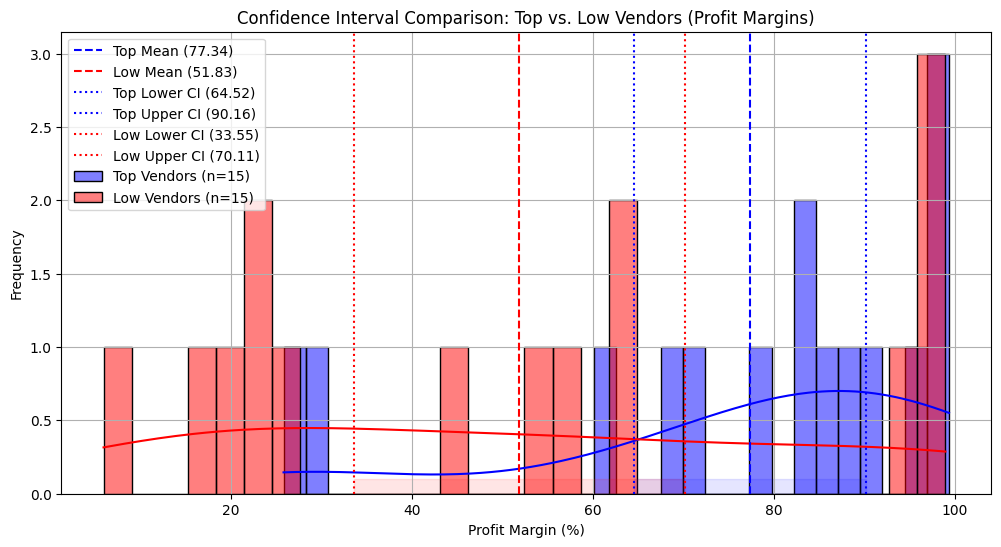

In [267]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors Profit Margin: Mean={top_mean:.2f}, 95% CI=({top_lower:.2f}, {top_upper:.2f})")
print(f"Low Vendors Profit Margin: Mean={low_mean:.2f}, 95% CI=({low_lower:.2f}, {low_upper:.2f})")

plt.figure(figsize=(12, 6))

# Top Vendors plot
sns.histplot(top_vendors, color='blue', label=f'Top Vendors (n={len(top_vendors)})', kde=True, bins=30, alpha=0.5)

# Low Vendors plot
sns.histplot(low_vendors, color='red', label=f'Low Vendors (n={len(low_vendors)})', kde=True, bins=30, alpha=0.5)

plt.axvline(top_mean, color='blue', linestyle='--', label=f'Top Mean ({top_mean:.2f})')
plt.axvline(low_mean, color='red', linestyle='--', label=f'Low Mean ({low_mean:.2f})')

# Add lines for confidence interval bounds
plt.axvline(top_lower, color='blue', linestyle=':', label=f'Top Lower CI ({top_lower:.2f})')
plt.axvline(top_upper, color='blue', linestyle=':', label=f'Top Upper CI ({top_upper:.2f})')
plt.axvline(low_lower, color='red', linestyle=':', label=f'Low Lower CI ({low_lower:.2f})')
plt.axvline(low_upper, color='red', linestyle=':', label=f'Low Upper CI ({low_upper:.2f})')

plt.fill_betweenx(y=[0, 0.1], x1=top_lower, x2=top_upper, color='blue', alpha=0.1)
plt.fill_betweenx(y=[0, 0.1], x1=low_lower, x2=low_upper, color='red', alpha=0.1)

plt.title('Confidence Interval Comparison: Top vs. Low Vendors (Profit Margins)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.grid(visible=True)
plt.legend()
plt.show()

#### From the above results, we observe the following:

- The confidence interval for top-performing vendors (64.52% to 90.16%) is greater than the confidence interval for low-performing vendors (33.55% to 70.11%)
- This suggests that vendors with higher sales tend to maintain higher profit margins, suggesting uniformity in the sales prices.
- For low-performing vendors: They could focus on the quality of their products and how can they improve from competitive products. Also, can focus on their pricing issues.
- For top-performing vendors: Their sales are in par with their pricing, hence, we dont need to worry for them.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

- $H_{0}$ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
- $H_{1}$ (Alternate Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.